# Imports and globals

In [57]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

In [60]:
model_name = 'test_model'
if not os.path.isdir(f'./models/{model_name}/evaluation/'):
    os.mkdir(f'./models/{model_name}/evaluation/')
with open(f'./models/{model_name}/history/evaluation_history.pkl', 'rb') as f:
    evaluation_history = pickle.load(f)

## Action history

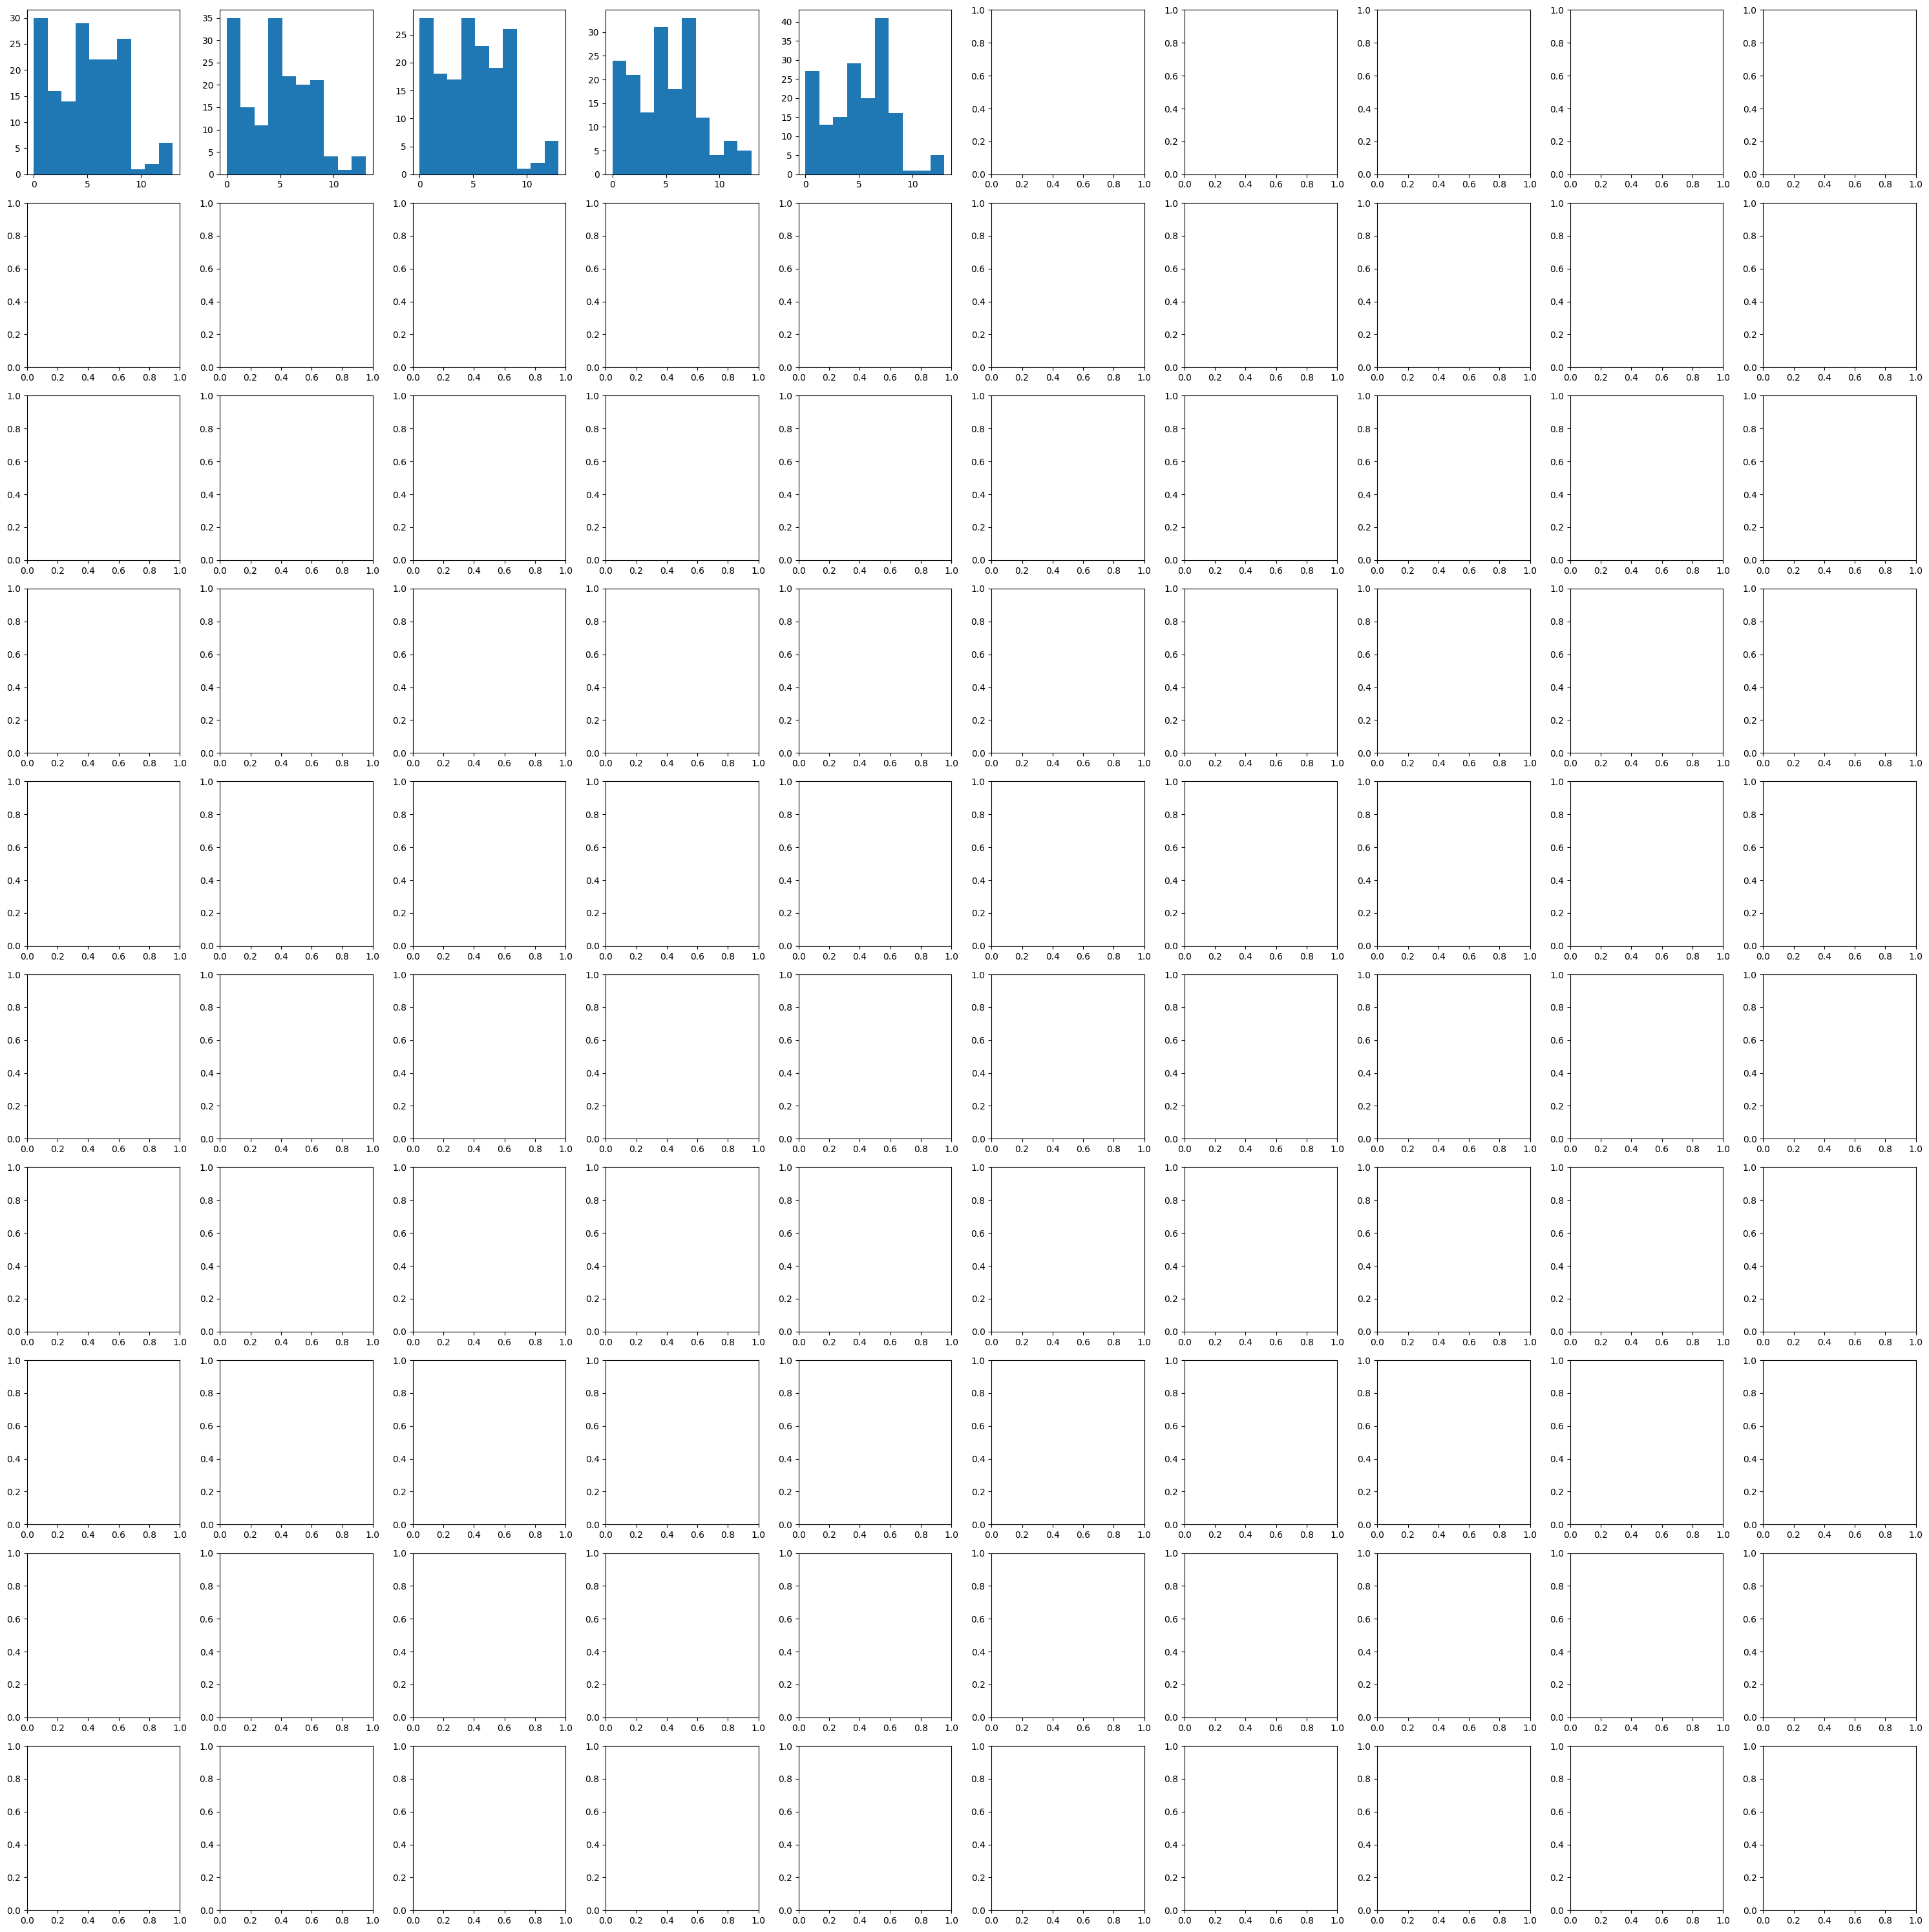

In [61]:
fig, axs = plt.subplots(10, 10, figsize=(30,30))
for i in range(len(evaluation_history)):
    counter = i // 10
    counter2 = i % 10
    axs[counter][counter2].hist(evaluation_history[f'Episode_{i+1}']['Action'])
fig.tight_layout()
plt.savefig(f'./models/{model_name}/evaluation/action_history_histograms.png', dpi=100)

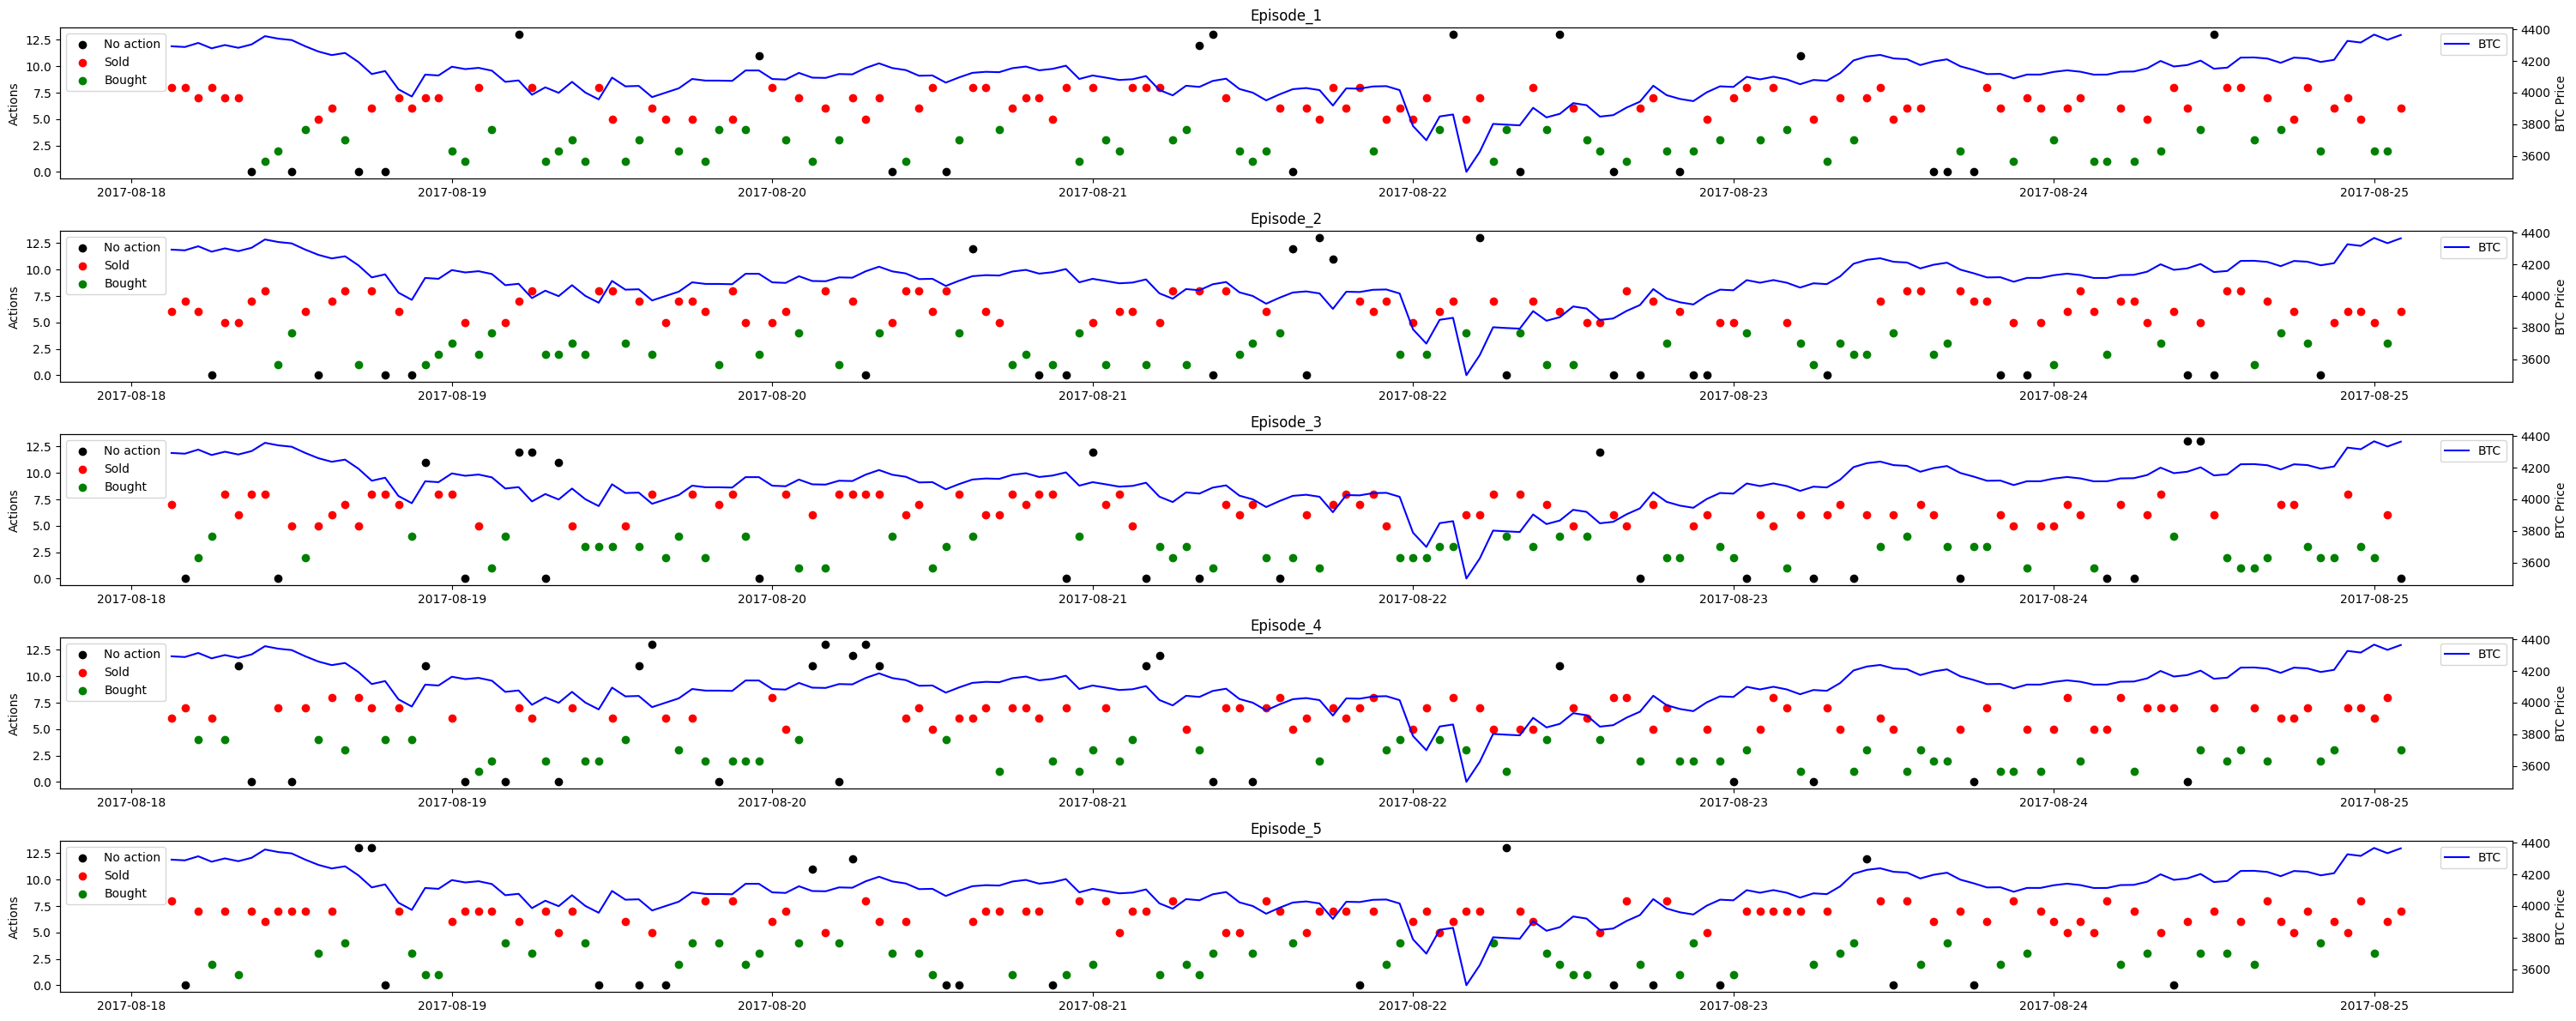

In [78]:
fig, axs = plt.subplots(len(evaluation_history), 1, figsize=(30, 12*len(evaluation_history)/5))
for i in range(len(evaluation_history)):
    buy_action_mask = [True if x in [1,2,3,4] else False for x in evaluation_history[f'Episode_{i+1}']['Action']]
    sell_action_mask = [True if x in [5,6,7,8] else False for x in evaluation_history[f'Episode_{i+1}']['Action']]
    neutral_action_mask = [True if x in [0, 9, 11,12,13,14] else False for x in evaluation_history[f'Episode_{i+1}']['Action']]
    axs[i].scatter(np.array(evaluation_history[f'Episode_{i+1}']['Datetime'])[neutral_action_mask], np.array(evaluation_history[f'Episode_{i+1}']['Action'])[neutral_action_mask], color='black', label='No action')
    axs[i].scatter(np.array(evaluation_history[f'Episode_{i+1}']['Datetime'])[sell_action_mask], np.array(evaluation_history[f'Episode_{i+1}']['Action'])[sell_action_mask], color='red', label='Sold')
    axs[i].scatter(np.array(evaluation_history[f'Episode_{i+1}']['Datetime'])[buy_action_mask], np.array(evaluation_history[f'Episode_{i+1}']['Action'])[buy_action_mask], color='green', label='Bought')
    axs2 = axs[i].twinx()
    axs2.plot(np.array(evaluation_history[f'Episode_{i+1}']['Datetime']), np.array(evaluation_history[f'Episode_{i+1}']['Current_price']), color='blue', label='BTC')
    axs[i].legend(loc="upper left")
    axs2.legend(loc="upper right")
    axs[i].set_ylabel('Actions')
    axs2.set_ylabel('BTC Price')
    axs[i].set_title(f'Episode_{i+1}')

fig.tight_layout()
plt.savefig(f'./models/{model_name}/evaluation/action_history_timeplots.png', dpi=100)

## Balance history

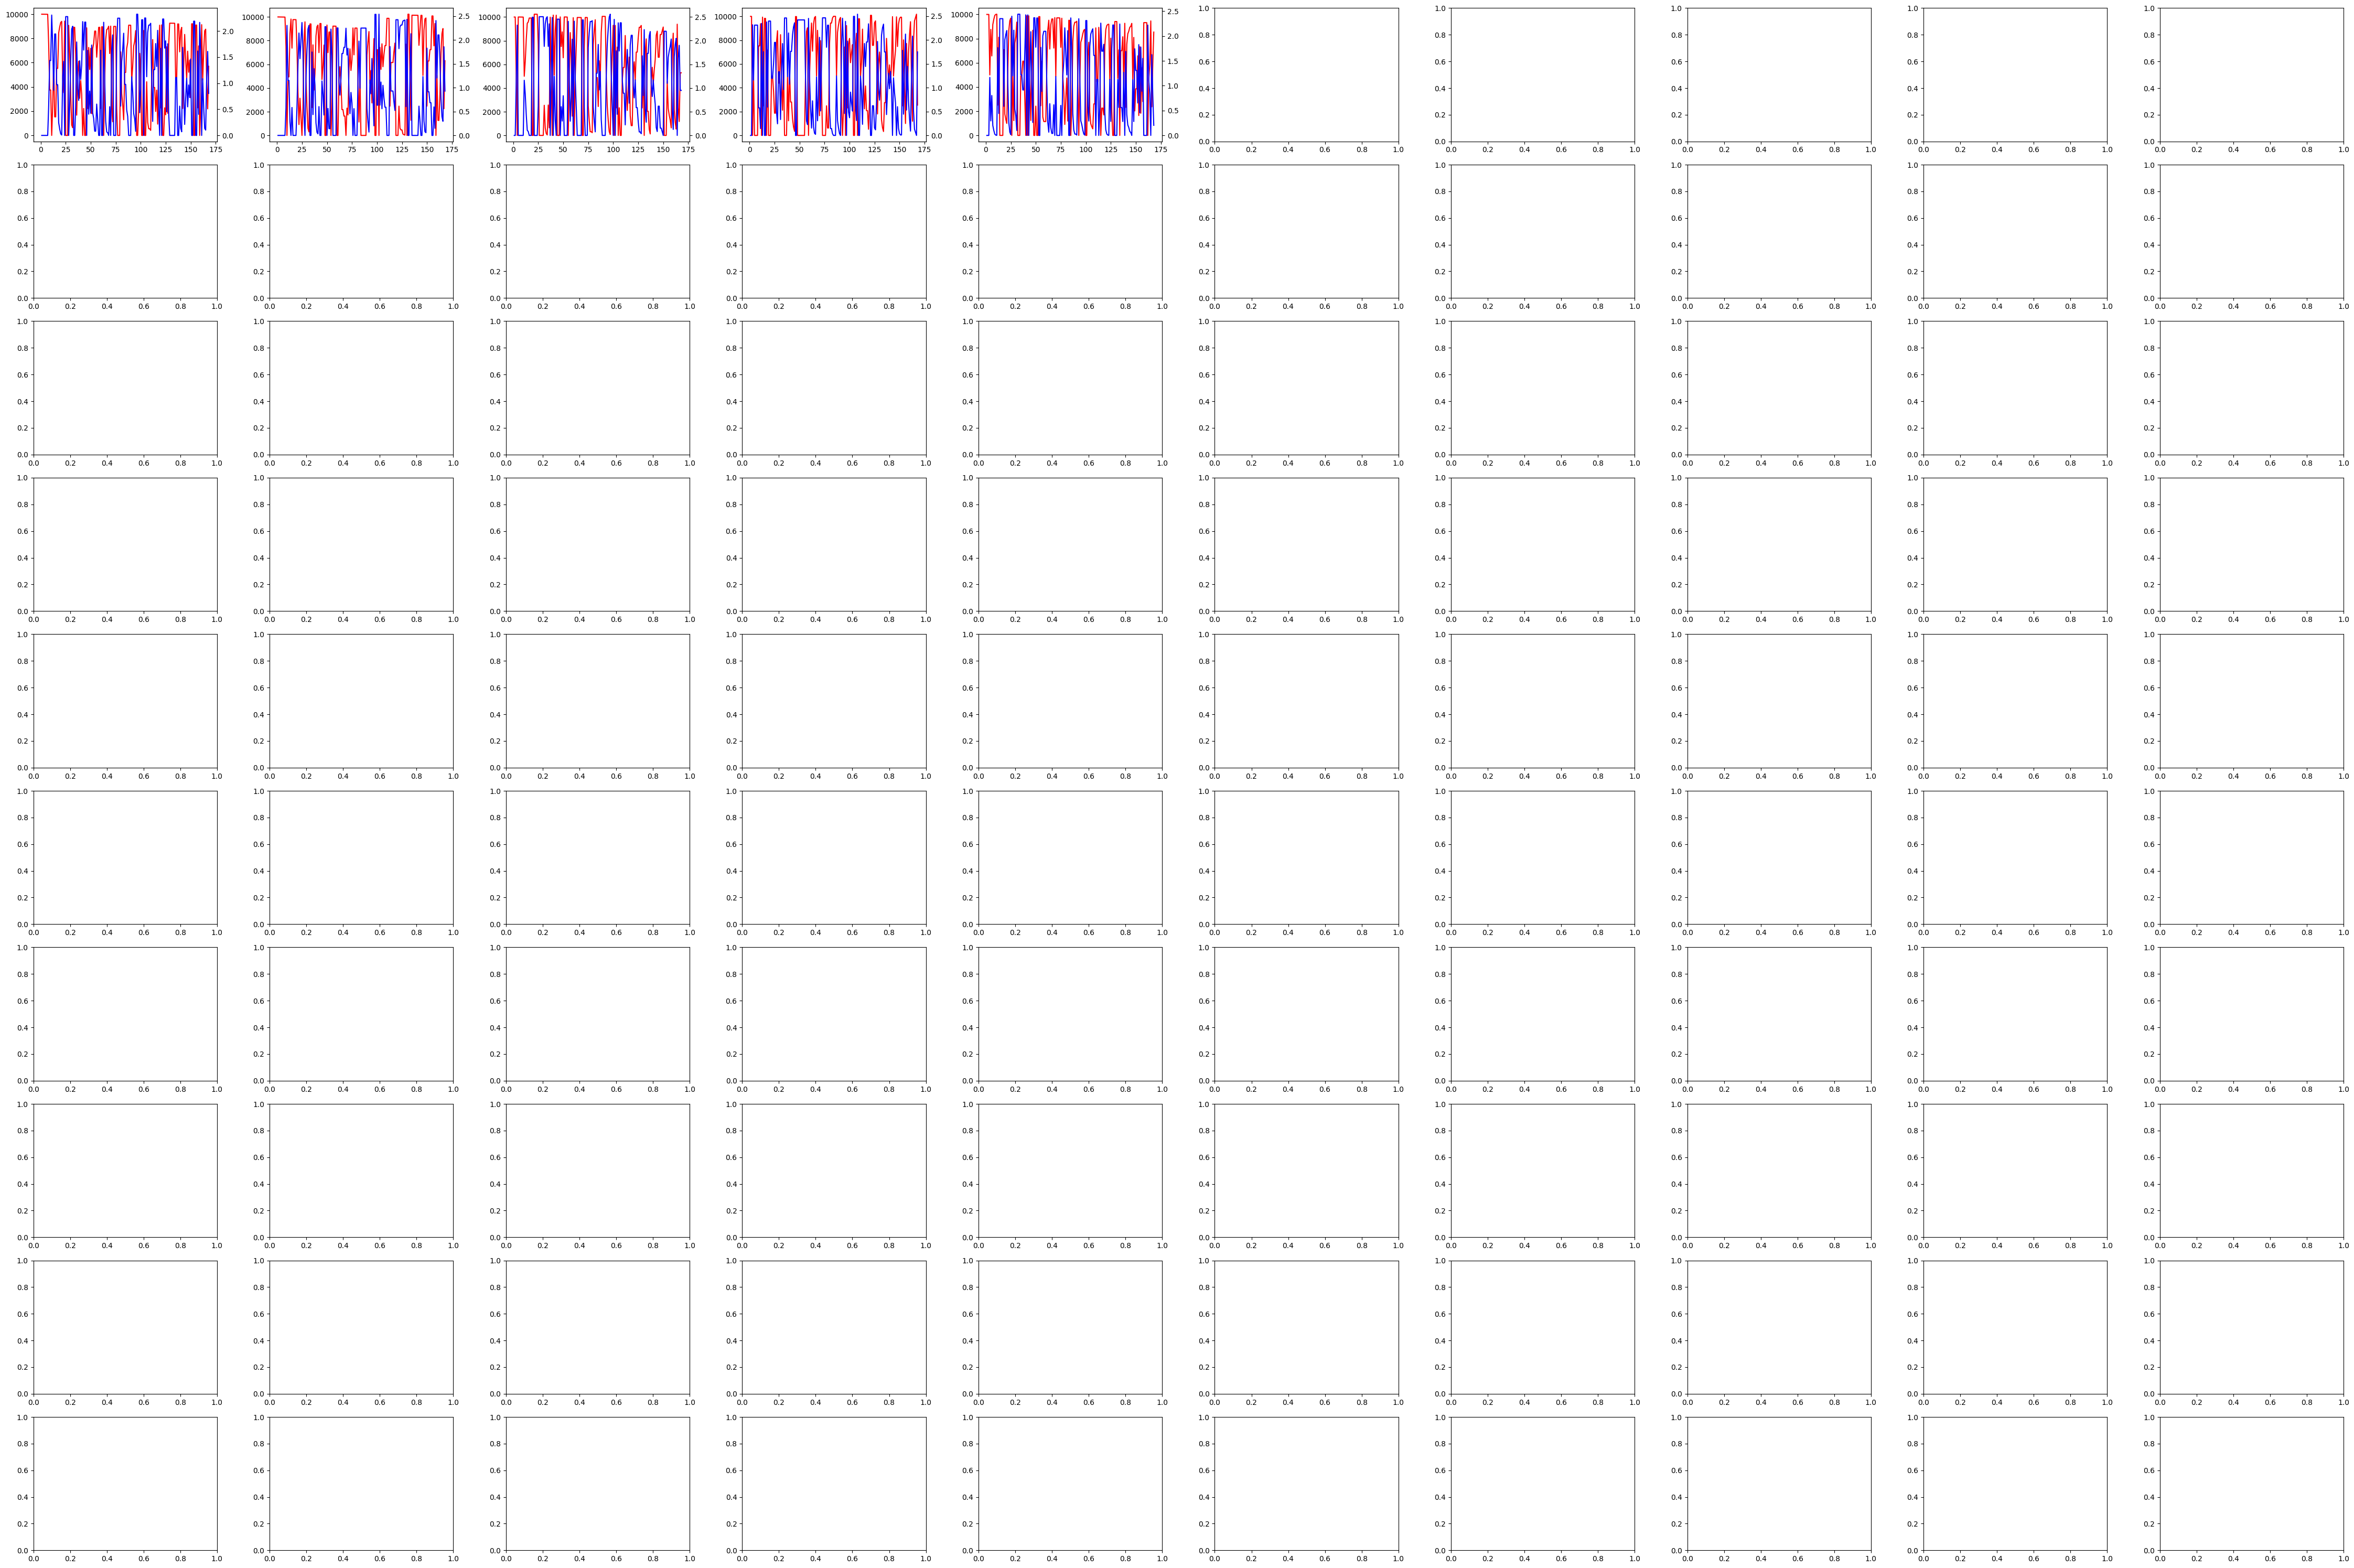

In [79]:
fig, axs = plt.subplots(10, 10, figsize=(45,30))
steps = len(evaluation_history['Episode_1']['Wallet_balance'])
for i in range(len(evaluation_history)):
    counter = i // 10
    counter2 = i % 10
    ax2 = axs[counter][counter2].twinx()
    ax2.plot(np.arange(1, steps+1), evaluation_history[f'Episode_{i+1}']['Wallet_balance'], color='blue')
    axs[counter][counter2].plot(np.arange(1, steps+1), evaluation_history[f'Episode_{i+1}']['Balance'], color='red')
fig.tight_layout()
plt.savefig(f'./models/{model_name}/evaluation/fiat_vs_crypto_balance.png', dpi=100)

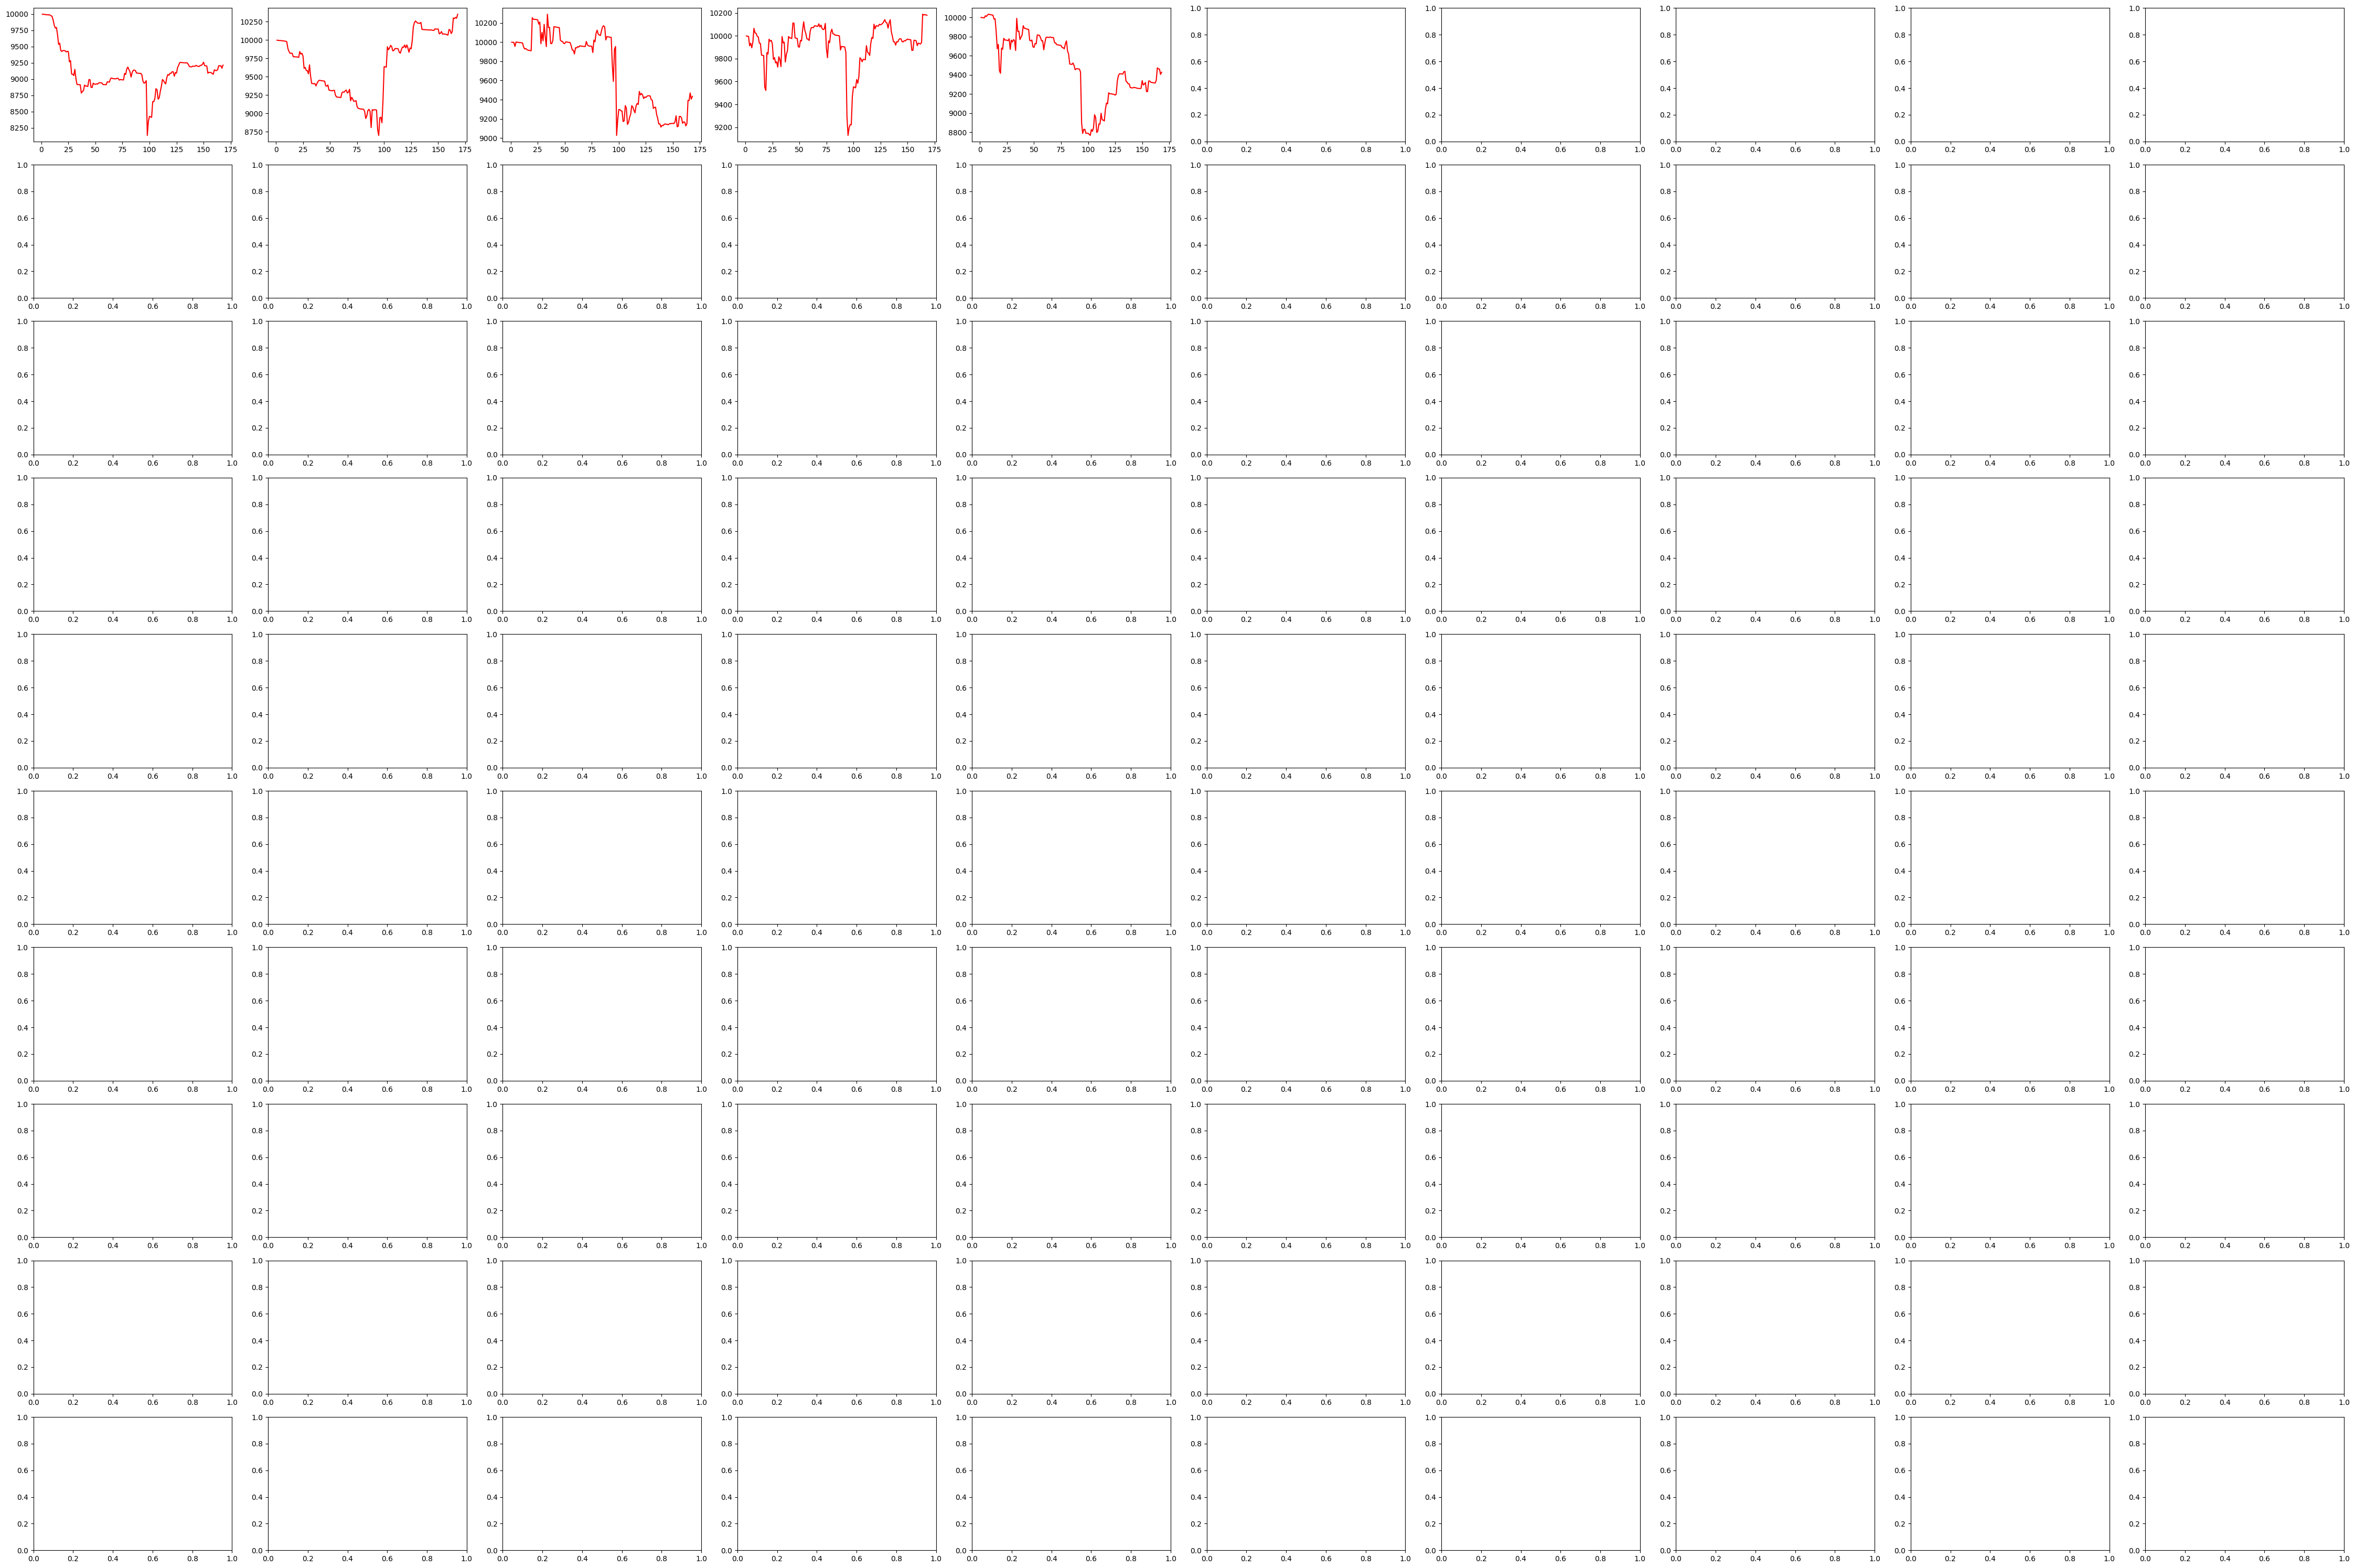

In [80]:
fig, axs = plt.subplots(10, 10, figsize=(45,30))
steps = len(evaluation_history['Episode_1']['Wallet_balance'])
for i in range(len(evaluation_history)):
    counter = i // 10
    counter2 = i % 10
    axs[counter][counter2].plot(np.arange(1, steps+1), [np.sum([x[0], x[1]*x[2]]) for x in zip(*[evaluation_history[f'Episode_{i+1}']['Balance'], evaluation_history[f'Episode_{i+1}']['Wallet_balance'], evaluation_history[f'Episode_{i+1}']['Current_price']])], color='red')
fig.tight_layout()
plt.savefig(f'./models/{model_name}/evaluation/Net_worth.png', dpi=100)

## Reward History

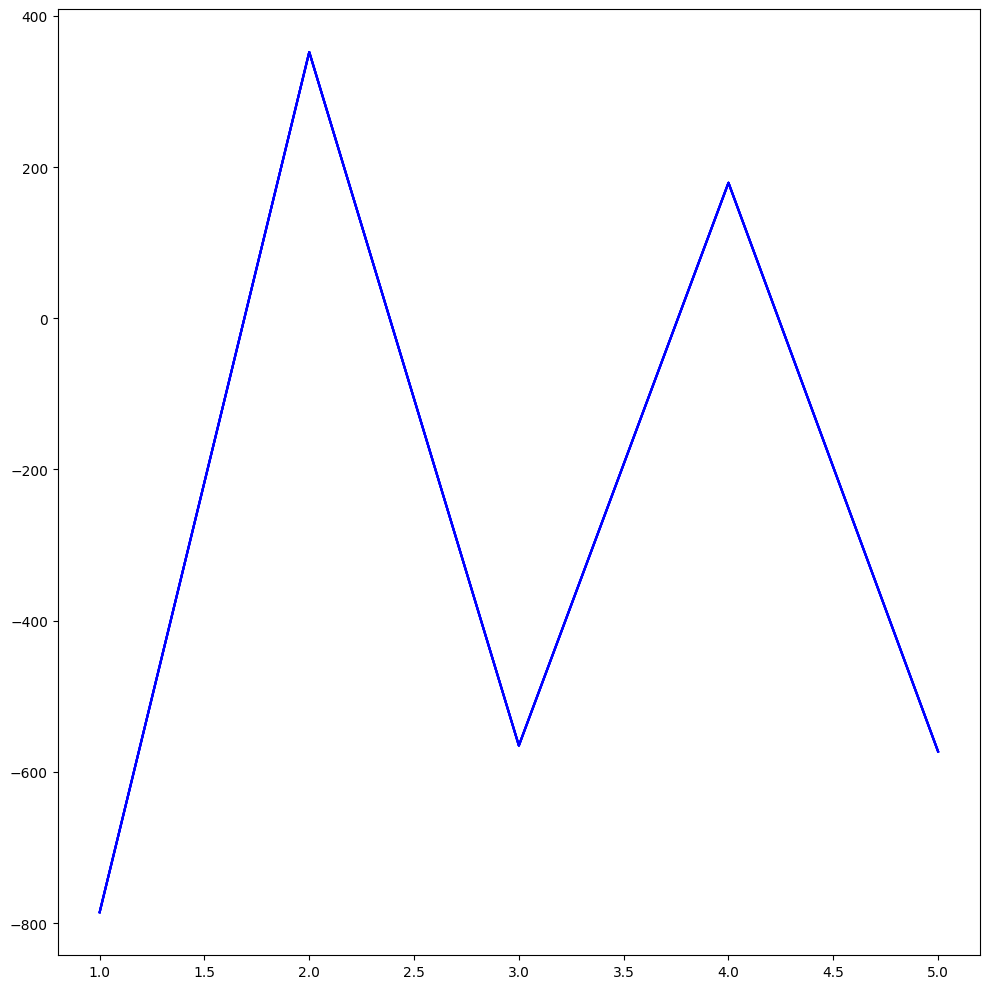

In [81]:
with open(f'./models/{model_name}/history/history.pkl', 'rb') as f:
    reward_history = pickle.load(f)
fig, ax = plt.subplots(figsize=(10,10))
episodes = len(reward_history['ep_rewards'])
for i in range(episodes):
    counter = i // 10
    counter2 = i % 10
    ax.plot(np.arange(1, episodes + 1), reward_history['ep_rewards'], color='blue')
fig.tight_layout()
plt.savefig(f'./models/{model_name}/evaluation/reward_history.png', dpi=100)

## Random tests

In [4]:
np.arange(0,9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])